In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider, generate_maxpercdiff_colormap
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval, dv, boolean_overlap_fraction
from LRGSG_package.nx_patches import signed_spectral_layout, get_kth_order_neighbours
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 100
eigenmode = 0
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    initCond = 'all_1', # f'ground_state_{eigenmode}'
    pflip = 0.01,
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
# #
# neg_weightsH = {(SLRG_obj.system.N//2+SLRG_obj.system.side1//2, 
#                  (SLRG_obj.system.N)//2+SLRG_obj.system.side1//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
SLRG_obj.flip_random_fract_edges()

In [3]:
SLRG_obj.compute_k_eigvV(howmany=10)

In [4]:
magn, ene = SLRG_obj.run_ising_dynamics(nstepsIsing=100, T=0.005, tqdm_on=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:17<?, ?it/s]


In [5]:
SLRG_obj.Ising_clusters = []
SLRG_obj.find_ising_clusters()
SLRG_obj.mapping_nodes_to_clusters()

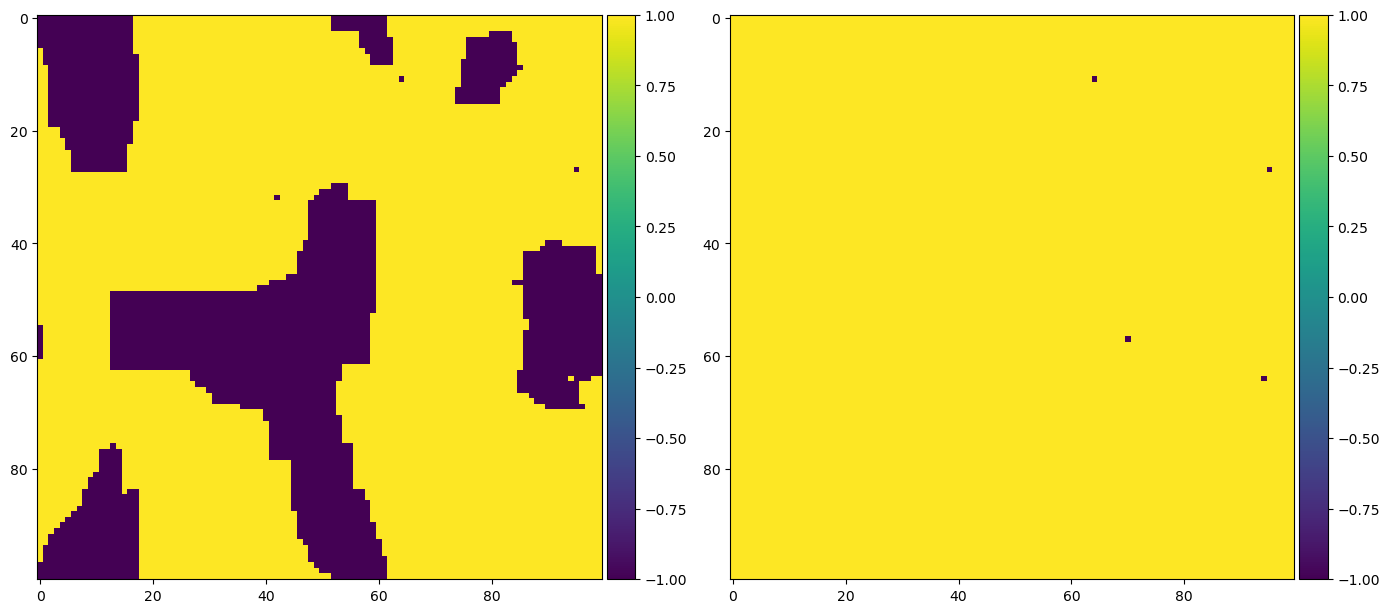

In [6]:
bineigv = SLRG_obj.eigV.T[0].reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
bineigv[bineigv < 0] = -1
bineigv[bineigv > 0] = +1

fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
im1 = ax[0].imshow(
    SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)
)
imshow_colorbar_caxdivider(im1, ax[0])
im2 = ax[1].imshow(bineigv)
imshow_colorbar_caxdivider(im2, ax[1])
fig.tight_layout()

In [7]:
plt.imshow(SLRG_obj.eigV[:, 1].reshape(100, 100))

IndexError: index 1 is out of bounds for axis 1 with size 1

In [122]:
boolean_overlap_fraction((SLRG_obj.eigV > 0).flatten(), (SLRG_obj.magn_array > 0))

0.4041

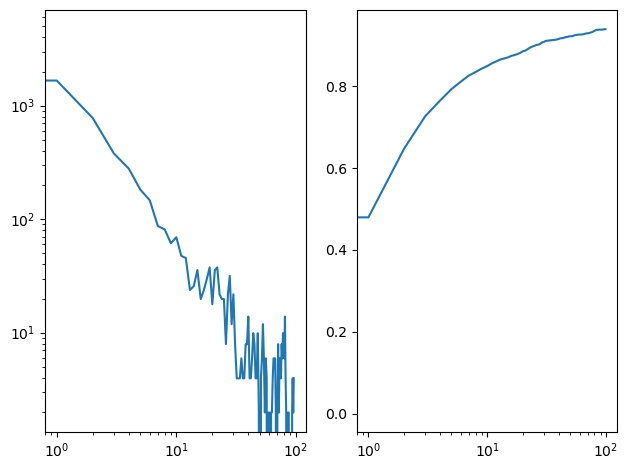

In [123]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.abs(np.roll(dv(np.array(ene)), 2)[2:]))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#
ax[1].plot(np.abs(ene)/SLRG_obj.system.N)
ax[1].set_xscale('log')
fig.tight_layout()


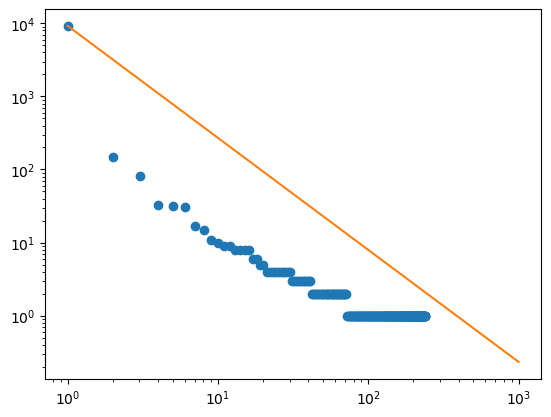

In [115]:
distr = np.unique(SLRG_obj.mapping, return_counts=True)
zipf  = sorted(distr[1], reverse=True)
plt.plot(np.linspace(1, len(zipf)+1, num=len(zipf)), zipf, 'o')
plt.plot(np.logspace(0, 3), max(zipf)*(np.logspace(0, 2))**-2.3)
plt.yscale('log')
plt.xscale('log')

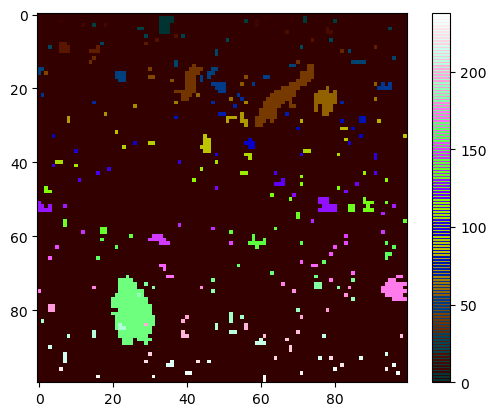

In [116]:
def map_tuple_to_numeric(tuple_value):
    # You can use a weighted sum of the tuple elements as an example
    # Adjust the weights as needed based on your data
    weight = [0.1, 0.2, 0.5]
    numeric_value = np.sum(tuple_value * weight)
    return numeric_value


vfunc = np.vectorize(map_tuple_to_numeric)
max_diff_cmap = generate_maxpercdiff_colormap(SLRG_obj.numIsing_cl, 2)
# Apply the mapping function to the entire 'result_array'
numeric_array = vfunc(SLRG_obj.mapping)
plt.imshow(
    SLRG_obj.mapping.astype(float),
    cmap=max_diff_cmap,
)
plt.colorbar()

In [86]:
randomMat = np.random.random((3, 3))

In [87]:
randomMat

array([[0.85796263, 0.54674124, 0.25676791],
       [0.33805081, 0.65638689, 0.91342706],
       [0.6632167 , 0.23000766, 0.00594048]])

In [88]:
idx0 = set(np.arange(0, SLRG_obj.system.N)) - set(sorted(SLRG_obj.biggestIsing_cl))
idx2Dcl = np.array([[i//SLRG_obj.system.side1, divmod(i, SLRG_obj.system.side2)[1]] for i in SLRG_obj.biggestIsing_cl])
idx2D = np.array([[i//SLRG_obj.system.side1, divmod(i, SLRG_obj.system.side2)[1]] for i in idx0])

In [89]:
idx2D = idx2D[:, 0], idx2D[:, 1]
idx2Dcl = idx2Dcl[:, 0], idx2Dcl[:, 1]

In [90]:

sum(SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)[idx2Dcl])/len(SLRG_obj.magn_array)

-0.0553

In [91]:


SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)[idx2D] = 0

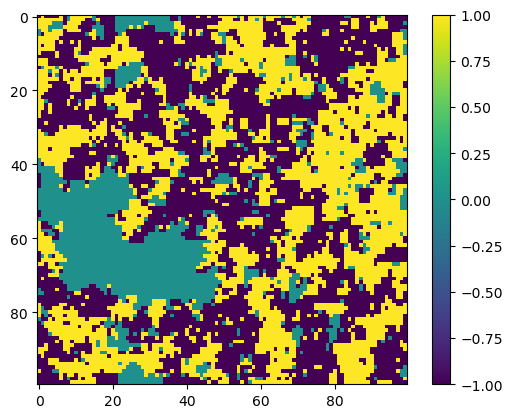

In [92]:
plt.imshow(SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2))
plt.colorbar()

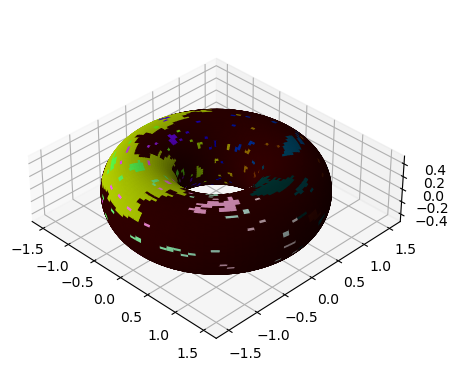

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib

# random colors
theta_dim, phi_dim = 100, 100
a = SLRG_obj.mapping.astype(float)

# Generating Torus Mesh
angle = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(angle, angle)
r, R = .5, 1
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# compute the indexes
t = np.floor(theta / (2 * np.pi) * (theta_dim - 1)).astype(int)
p = np.floor(phi / (2 * np.pi) * (phi_dim - 1)).astype(int)
# extract the color value from the matrix
colors = a[t, p]
# apply a colormap to the normalized color values
norm = Normalize(vmin=colors.min(), vmax=colors.max())
cmap = max_diff_cmap#matplotlib.colormaps.get_cmap("viridis")
normalized_colors = cmap(norm(colors))

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=normalized_colors)
ax.set_aspect("equal")
ax.view_init(elev=35., azim=-45)
plt.show()